In [2]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [5]:
# Load the  price data
df = pd.read_csv('bitcoin.csv') 
data5=pd.read_csv("sample.csv")

In [6]:
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2023-07-07,2023-07-08,29826.18,30410.86,29826.18,30320.04,5.611768e+10,5.861909e+11
1,2023-07-06,2023-07-07,30484.82,31383.97,29949.46,29970.05,5.104573e+10,5.924918e+11
2,2023-07-05,2023-07-06,30789.19,30871.37,30223.32,30502.92,4.059839e+10,5.940779e+11
3,2023-07-04,2023-07-05,31143.22,31319.97,30679.97,30771.96,4.730203e+10,6.016407e+11
4,2023-07-03,2023-07-04,30625.27,31332.23,30581.51,31154.04,4.870586e+10,5.985364e+11


In [7]:
df.tail()

,Start,End,Open,High,Low,Close,Volume,Market Cap
305,2022-09-05,2022-09-06,20000.399476,20040.553289,19660.148568,19808.095961,3.528726e+10,3.788443e+11
306,2022-09-04,2022-09-05,19830.806457,19999.596577,19620.934300,19975.308100,3.018890e+10,3.790301e+11
307,2022-09-03,2022-09-04,19957.571300,20046.548100,19678.207000,19834.795623,4.642224e+10,3.797580e+11
308,2022-09-02,2022-09-03,20123.430130,20409.616991,19787.500414,19927.546600,5.377763e+10,3.845049e+11
309,2022-09-01,2022-09-02,20053.474000,20185.997600,19619.654900,20145.588400,5.997624e+10,3.822196e+11


In [8]:
df.shape

(310, 8)

In [9]:
# Clean the data (if required)
df = df.dropna()  # Drop any rows with missing values

In [10]:
# Visualize the data
plt.figure(figsize=(315,35))
plt.plot(df['Start'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Data')
plt.show()

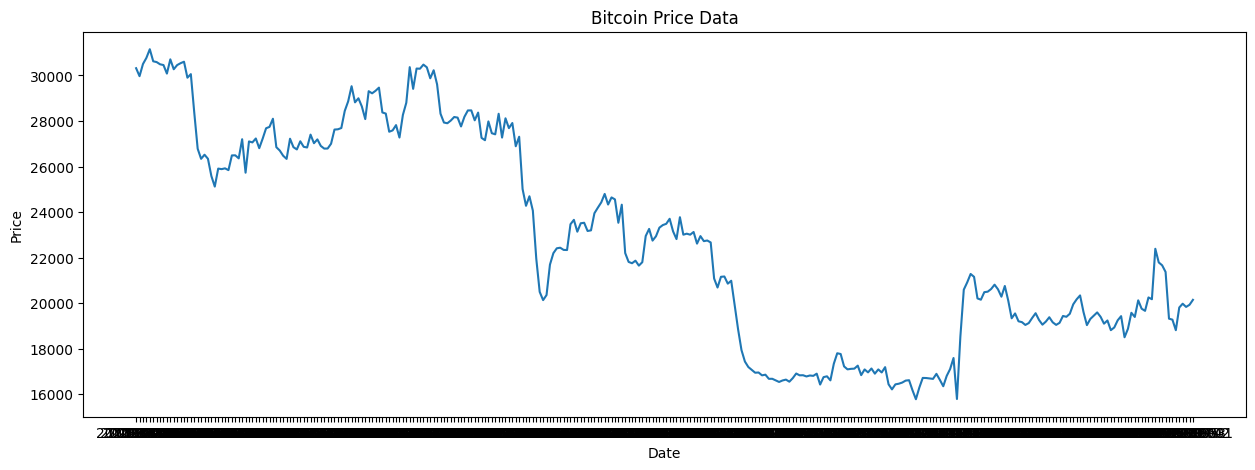

In [11]:
# Visualize the data
plt.figure(figsize=(15,5))
plt.plot(df['Start'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Data')
plt.show()

In [12]:
# Preprocess the data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [13]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [14]:
train_size,test_size

(248, 62)

In [15]:
train_data

array([[9.45752810e-01],
       [9.22987854e-01],
       [9.57648165e-01],
       [9.75147762e-01],
       [1.00000000e+00],
       [9.65508154e-01],
       [9.63250456e-01],
       [9.56939830e-01],
       [9.54797911e-01],
       [9.30400335e-01],
       [9.71103290e-01],
       [9.42745148e-01],
       [9.54706849e-01],
       [9.60095793e-01],
       [9.64326294e-01],
       [9.18663039e-01],
       [9.28819752e-01],
       [8.18979600e-01],
       [7.15610734e-01],
       [6.86835657e-01],
       [6.98581409e-01],
       [6.87041198e-01],
       [6.37792034e-01],
       [6.07512476e-01],
       [6.58905509e-01],
       [6.57445908e-01],
       [6.59609942e-01],
       [6.54535163e-01],
       [6.96594297e-01],
       [6.96854475e-01],
       [6.88146956e-01],
       [7.42813683e-01],
       [6.47229354e-01],
       [7.36593469e-01],
       [7.33756874e-01],
       [7.44947796e-01],
       [7.17247256e-01],
       [7.44487281e-01],
       [7.74214610e-01],
       [7.78089317e-01],


In [16]:
test_data

array([[0.30581256],
       [0.30730243],
       [0.31493136],
       [0.32730547],
       [0.31405391],
       [0.29296137],
       [0.3235352 ],
       [0.28170187],
       [0.23126097],
       [0.24513701],
       [0.22263992],
       [0.2202642 ],
       [0.21223785],
       [0.2175753 ],
       [0.23228061],
       [0.24574757],
       [0.22633235],
       [0.21301538],
       [0.22187073],
       [0.23420721],
       [0.219721  ],
       [0.21240766],
       [0.21825077],
       [0.23782667],
       [0.23552899],
       [0.24411603],
       [0.27112213],
       [0.2854568 ],
       [0.29658736],
       [0.24914786],
       [0.21174475],
       [0.22929521],
       [0.23868998],
       [0.24803882],
       [0.23543001],
       [0.21585101],
       [0.22497506],
       [0.19735049],
       [0.2050051 ],
       [0.22544441],
       [0.23735819],
       [0.17704154],
       [0.20119781],
       [0.24695256],
       [0.23504658],
       [0.28253217],
       [0.25863658],
       [0.252

In [17]:
# Function to create sequences of data
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [18]:
# Define the sequence length
sequence_length = 10

In [19]:
# Create the training sequences
X_train, y_train = create_sequences(train_data, sequence_length)

In [20]:
# Create the testing sequences
X_test, y_test = create_sequences(test_data, sequence_length)

In [21]:
print(X_train.shape), print(y_train.shape)

(238, 10, 1)
(238, 1)


(None, None)

In [22]:
print(X_test.shape), print(y_test.shape)

(52, 10, 1)
(52, 1)


(None, None)

In [23]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
8/8 [==============================] - 4s 7ms/step - loss: 0.2262
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0333
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0211
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0198
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0119
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0110
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 9/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 11/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 12/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 13/50
8/8 [==============================] - 0s 8ms/step - loss: 0.

In [26]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training loss: {train_loss}')
print(f'Testing loss: {test_loss}')

Training loss: 0.004533620551228523
Testing loss: 0.0025083445943892


In [27]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


2/2 [==============================] - 0s 8ms/step


In [28]:
# Invert the scaling of the predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

In [29]:
# Prepare dates for plotting
train_dates = df['Start'].values[sequence_length:train_size]
test_dates = df['Start'].values[train_size + sequence_length:]
pred_dates = data5['Start'].values[sequence_length:train_size]


In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predictions))

1035.169204915029

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predictions))

769.9854717654154

In [32]:
len(test_data)

62

In [33]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 0)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[]

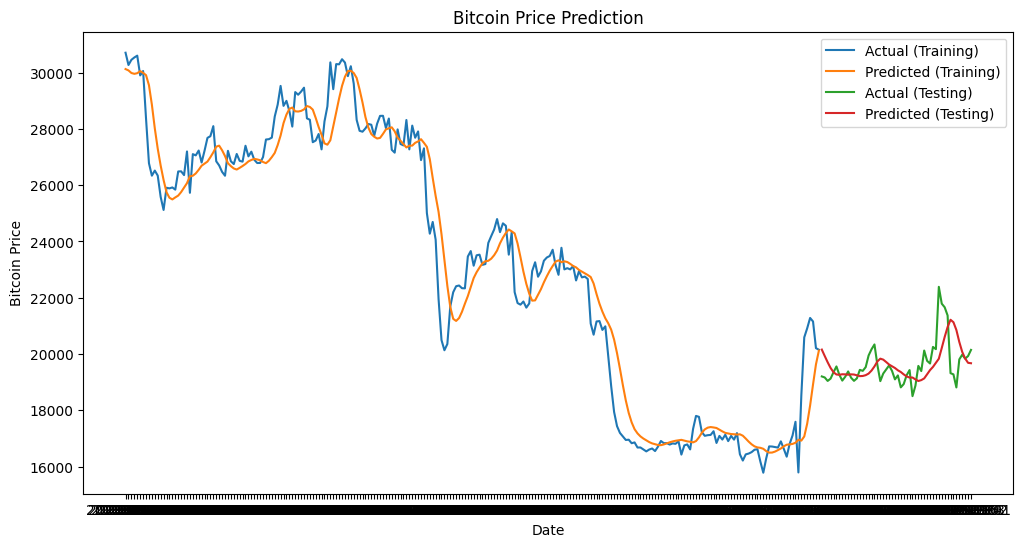

In [36]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_dates, y_train, label='Actual (Training)')
plt.plot(train_dates, train_predictions, label='Predicted (Training)')
plt.plot(test_dates, y_test, label='Actual (Testing)')
plt.plot(test_dates, test_predictions, label='Predicted (Testing)')

plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

In [37]:
future_dates = pd.date_range('2023-05-05', periods=300)
future_dates = future_dates.values.reshape(-1, 1)
future_dates = np.float32(future_dates)
future_dates = tf.expand_dims(future_dates, axis=1)
pred = model.predict(future_dates)
print(pred)

10/10 [==============================] - 1s 3ms/step
[[1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.398155 ]
 [1.398155 ]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.398155 ]
 [1.398155 ]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551]
 [1.3981551

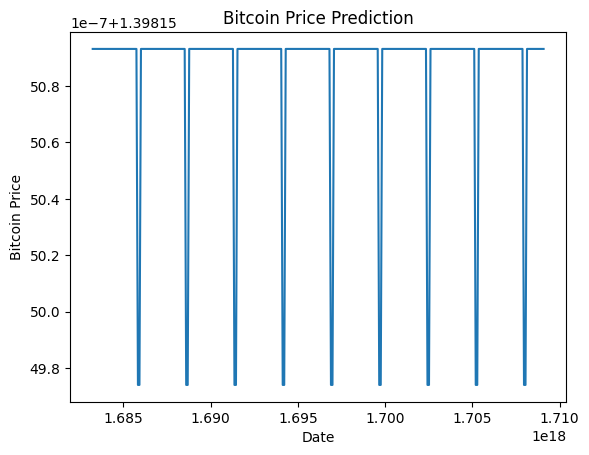

In [38]:
import matplotlib.pyplot as plt
import tensorflow as tf



# Reshape the future_dates variable to a 2D array.
future_dates = tf.reshape(future_dates, (-1, 1))

# Plot the predicted Bitcoin price data.
plt.plot(future_dates, pred, label='Predicted Bitcoin Price')

# Add a title and labels to the axes.
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')

# Show the plot.
plt.show()

In [41]:
%pip install dateutil


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dateutil (from versions: none)
ERROR: No matching distribution found for dateutil

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


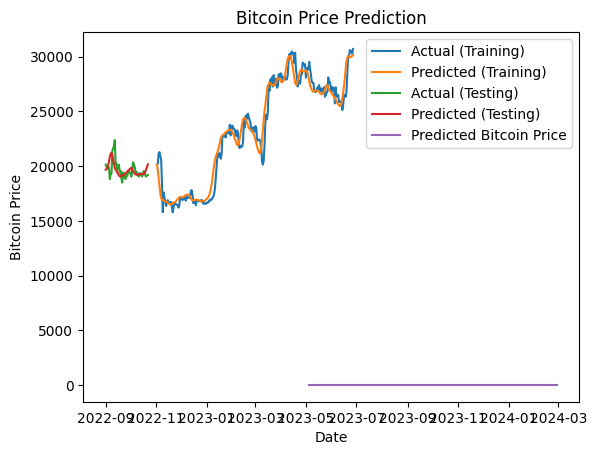

In [46]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

# Convert the train_dates variable to a list.
train_dates_list = train_dates.tolist()

# Plot the actual Bitcoin price data.
plt.plot(pd.to_datetime(train_dates_list), y_train, label='Actual (Training)')
plt.plot(pd.to_datetime(train_dates_list), train_predictions, label='Predicted (Training)')
plt.plot(pd.to_datetime(test_dates), y_test, label='Actual (Testing)')
plt.plot(pd.to_datetime(test_dates), test_predictions, label='Predicted (Testing)')

# Convert the future_dates variable to a NumPy array.
future_dates_np = np.array(future_dates)

# Reshape the future_dates_np variable to a 1-d array.
future_dates_1d = future_dates_np.reshape(-1)

# Plot the predicted Bitcoin price data.
plt.plot(pd.to_datetime(future_dates_1d), pred, label='Predicted Bitcoin Price')

plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()
